<a href="https://colab.research.google.com/github/bysischpok/Lab1/blob/main/%D0%9B%D0%B0%D0%B14_%D0%9F%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
#Cчитываем датасет и выводим на экран
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [256]:
#Выводим информацию о таргетном признаке и о датасете в целом
print(data['Type'].unique())
print(data['Type'].value_counts())
data.info()

[1 2 3 5 6 7]
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


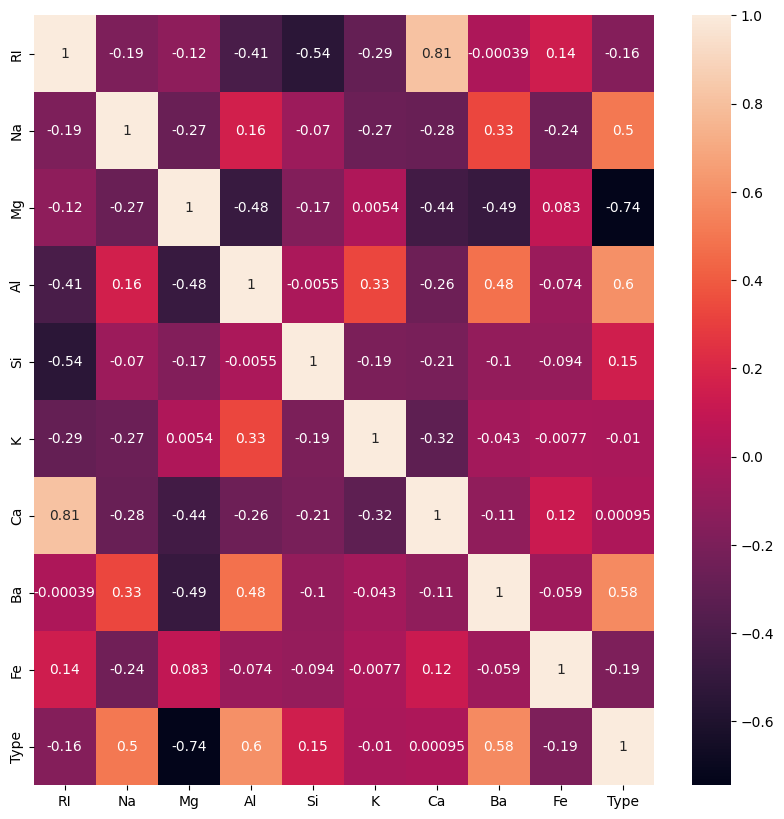

In [257]:
#Дополнительно выводим информацию о корреляции в датасете
plt.figure(figsize =(10,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

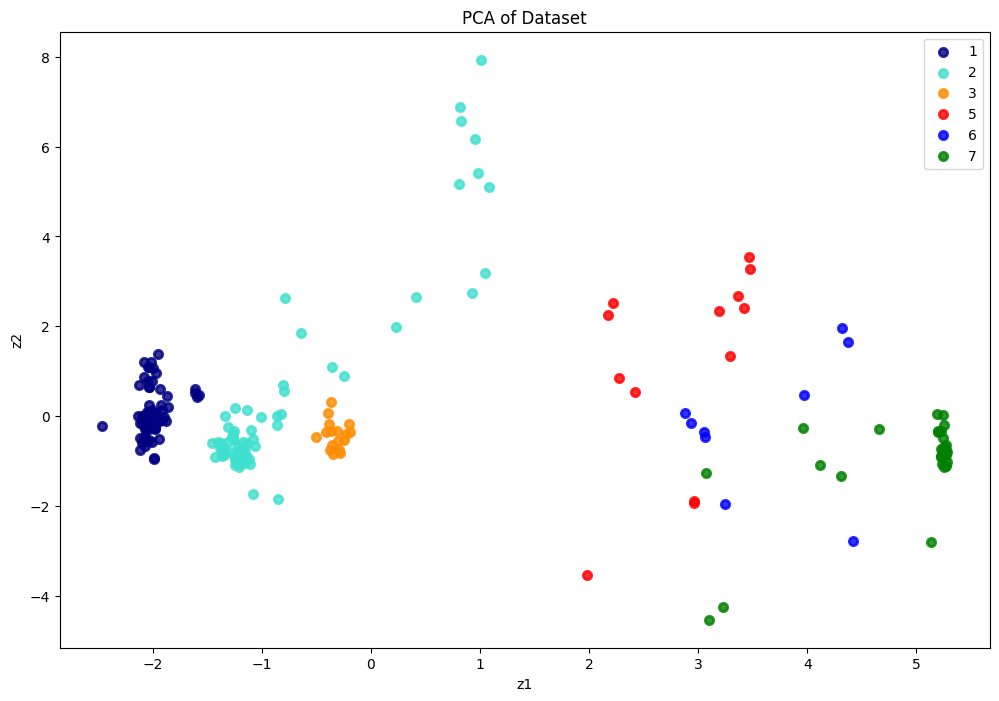

In [260]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
#Делим датасет на 2 части
X = data
y = data['Type']

# Применение PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
colors = ["navy", "turquoise", "darkorange",'red','blue',"green",'orange','purple']
lw = 2

# Уникальные значения для целевого признака
unique_vals = y.unique()
#Выводим
for color, i, target_name in zip(colors, unique_vals, unique_vals):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1], color=color, alpha=0.8, lw=lw, label=target_name )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA of Dataset")
plt.show()

#Разделение получилось достаточно хорошее, 5 6 7 тип немного перемешаны между собой

In [261]:
#Выводим вклад оставленных(новых) признаков
pca.explained_variance_ratio_

array([0.57597603, 0.23483424])

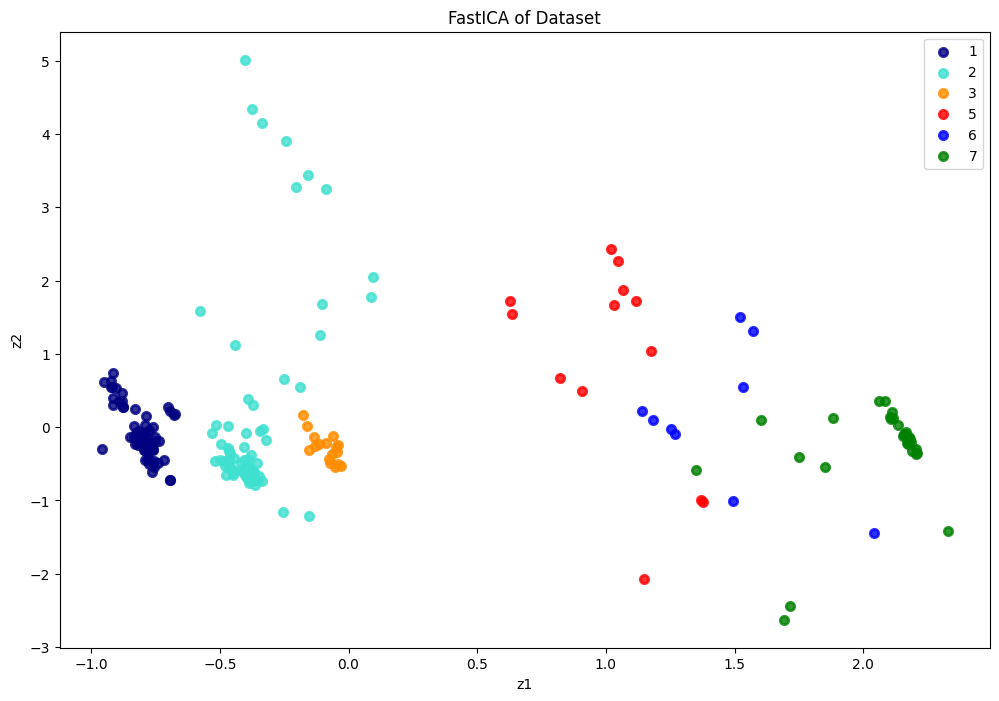

In [223]:
from sklearn.decomposition import FastICA
#Применяем ICA
fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange",'red','blue',"green"]
lw = 2
unique_vals = y.unique()

for color, i, target_name in zip(colors, unique_vals, unique_vals):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1], color=color, alpha=0.8, lw=lw, label=target_name )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("FastICA of Dataset")
plt.show()

#Разделение получилось примерно такое же как и при PCA

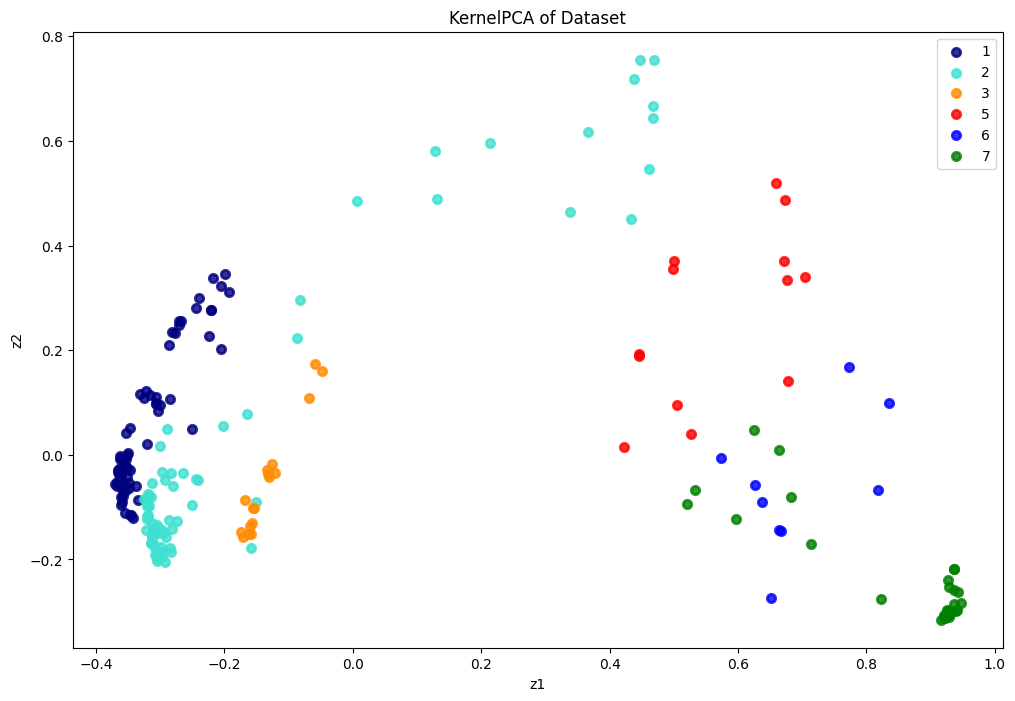

In [268]:
from sklearn.decomposition import KernelPCA
#Применяем PCA с ядром радиальной базовой функции
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
X_new = rbf_pca.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange",'red','blue',"green"]
lw = 2

unique_vals = y.unique()

for color, i, target_name in zip(colors, unique_vals, unique_vals):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1], color=color, alpha=0.8, lw=lw, label=target_name )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("KernelPCA of Dataset")
plt.show()

#Опять же похожеее разделение, остается наложение типов 5 6 7

Прежняя размерность:  (214, 10)
Новая размерность:  (214, 2)
Расхождение Кульбака-Лейблера после оптимизации:  0.19304350018501282
Количество иттераций:  999


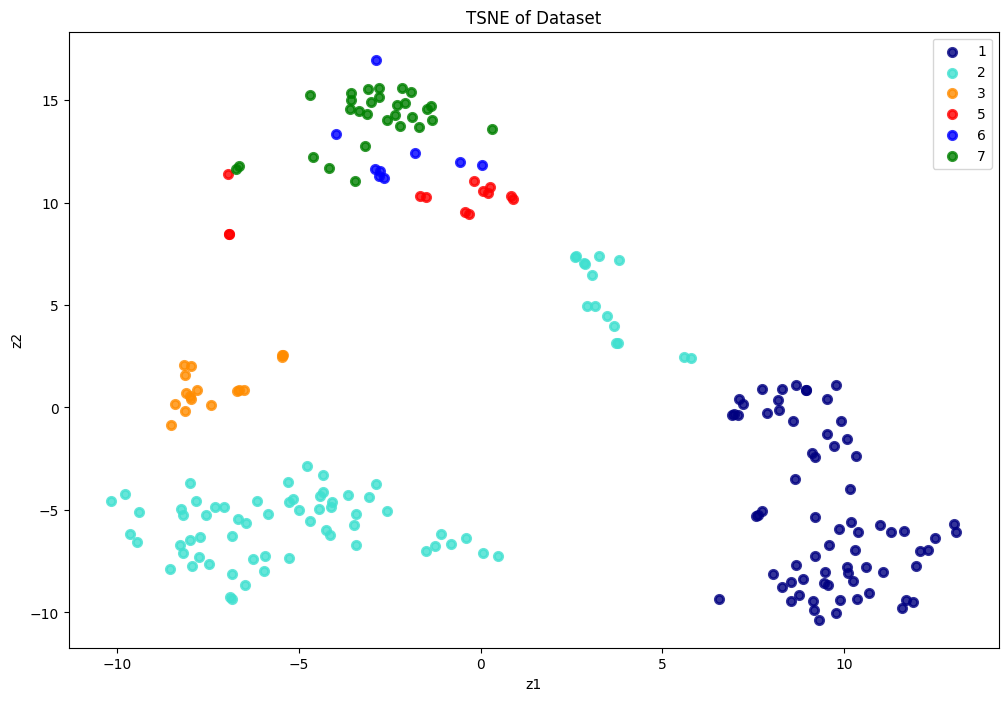

In [270]:
from sklearn.manifold import TSNE
#Применяем TNSE
tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)
# Вывод результатов
print('Прежняя размерность: ', X.shape)
print('Новая размерность: ', X_new.shape)
print('Расхождение Кульбака-Лейблера после оптимизации: ', tsne.kl_divergence_)
print('Количество иттераций: ', tsne.n_iter_)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange",'red','blue',"green"]
lw = 2
unique_vals = y.unique()

for color, i, target_name in zip(colors, unique_vals, unique_vals):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1], color=color, alpha=0.8, lw=lw, label=target_name )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("TSNE of Dataset")
plt.show()

#Осталась всё та же проблема с наложением 5 6 7 типов

In [271]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
#Применяем DBSCAN с некоторыми произвольным параметром eps
dbscan_cluster1 = DBSCAN(eps = 0.28, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [272]:
#Выводим данные о работе DBSCAN
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Количество кластеров: %d' % N_clus)
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Количество шумов: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

Количество кластеров: 10
Количество шумов: 142
v_measure = 0.3163758828589311


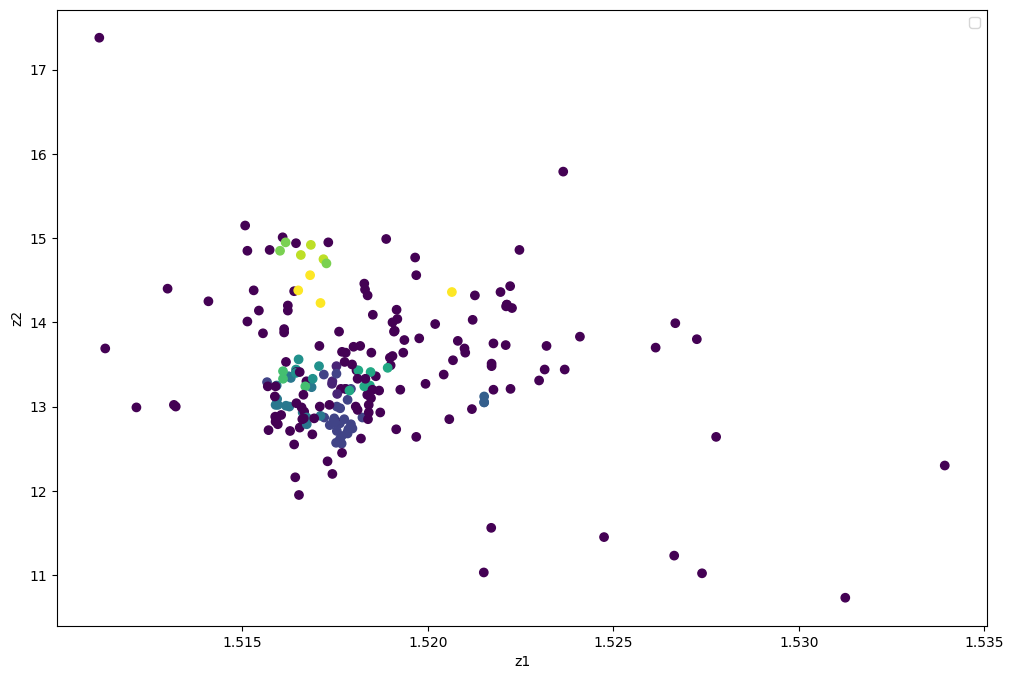

In [273]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange",'red','blue',"green"]
lw = 2

plt.scatter(
        X[data.columns[0]], X[data.columns[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#С такими начальными параметрами получается очень плохое разделение и множество выбросов

In [274]:
#Методом локтя находим лучшее значение eps
from sklearn.neighbors import NearestNeighbors
import sklearn
min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

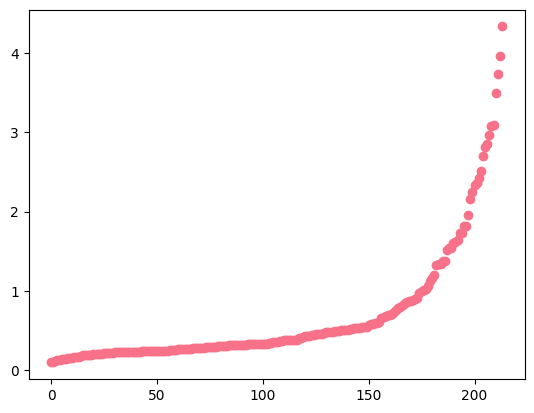

In [275]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

#Наилучшее значение eps находится в пределах от 0.5 до 1.5

DBSCAN(eps=1, min_samples=3)
Количество кластеров: 7
Количество шумов: 40
v_measure = 0.8063020958993801


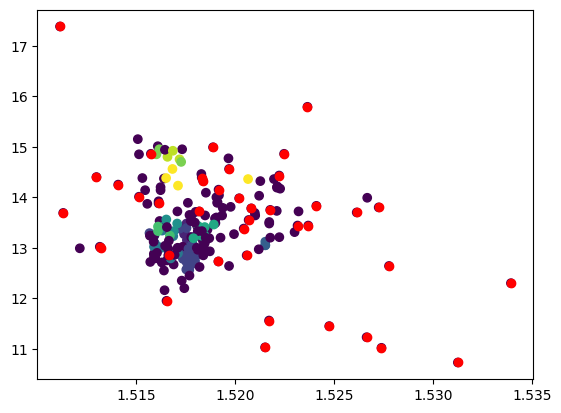

In [276]:
#Методом подбора находим лучшее значение eps
dbscan = DBSCAN(eps = 1, min_samples = 3)
print(dbscan)
pred = dbscan.fit_predict(X)
#Выводим новые значения работы DBSCAN
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Количество кластеров: %d' % N_clus)
n_noise = list(dbscan.labels_).count(-1)
print('Количество шумов: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных
#Накладываем два графика друг на друга
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]
plt.scatter( X[data.columns[0]], X[data.columns[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[data.columns[0]], values[data.columns[1]], color='r')
plt.show()

#Получилось, что лучше бы начальный датасет был разбит на 7 классов, а не на 6 как сейчас
#Это можно заметить и на графиках полученных с PCA ICA KernelPCA